<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [10]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2024-12-11 23:03:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  64.1MB/s    in 3.1s    

2024-12-11 23:03:34 (64.1 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [11]:
!pip install pandas

In [12]:
!pip install matplotlib

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [14]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [15]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [16]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [17]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


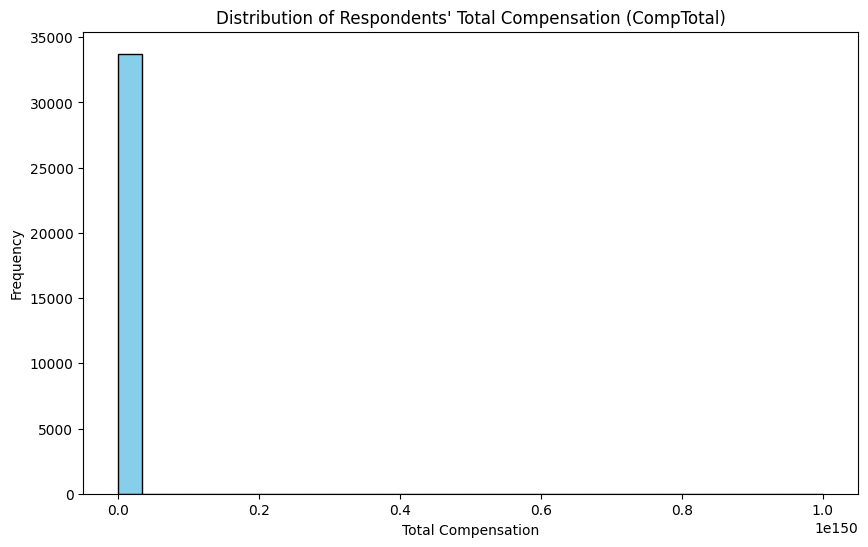

In [18]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for the 'CompTotal' column
data_query = "SELECT CompTotal FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'CompTotal' to numeric, coercing errors to NaN (if any non-numeric values)
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')

# Drop rows with NaN in 'CompTotal' (if any)
data_cleaned = data.dropna(subset=['CompTotal'])

# Plot the histogram of 'CompTotal'
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['CompTotal'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Respondents\' Total Compensation (CompTotal)')

# Show the plot
plt.show()

# Close the connection
conn.close()



**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


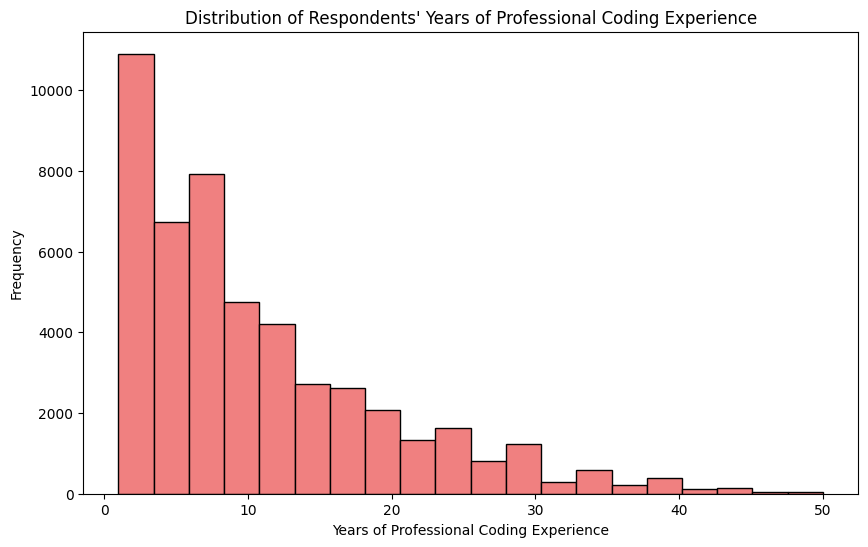

In [19]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for the 'YearsCodePro' column
data_query = "SELECT YearsCodePro FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'YearsCodePro' to numeric, coercing errors to NaN (if any non-numeric values)
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

# Drop rows with NaN in 'YearsCodePro' (if any)
data_cleaned = data.dropna(subset=['YearsCodePro'])

# Plot the histogram of 'YearsCodePro'
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['YearsCodePro'], bins=20, color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.title('Distribution of Respondents\' Years of Professional Coding Experience')

# Show the plot
plt.show()

# Close the connection
conn.close()


### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


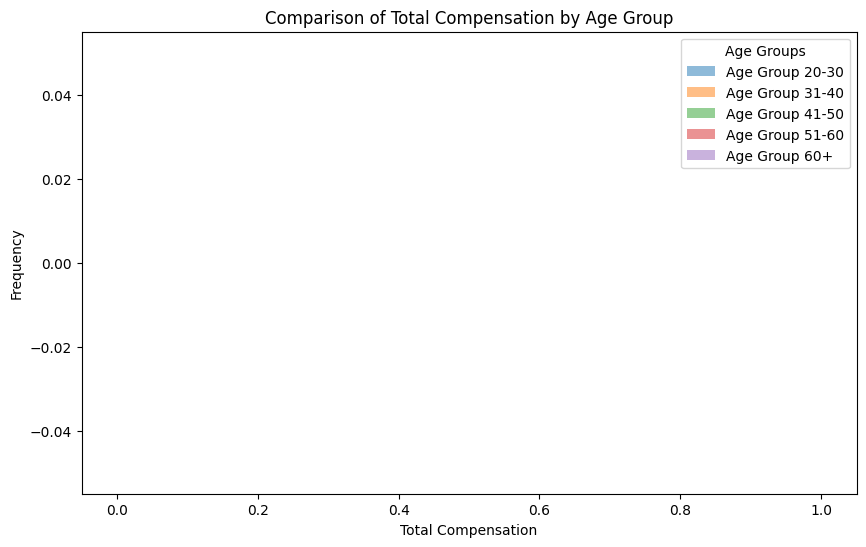

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'Age' and 'CompTotal' columns
data_query = "SELECT Age, CompTotal FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'Age' and 'CompTotal' columns to numeric, coercing errors to NaN (if any non-numeric values)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')

# Drop rows with NaN in 'Age' or 'CompTotal'
data_cleaned = data.dropna(subset=['Age', 'CompTotal'])

# Define age groups (e.g., 20-30, 31-40, etc.)
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '31-40', '41-50', '51-60', '60+']
data_cleaned['AgeGroup'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)

# Plot histograms of 'CompTotal' for each age group
plt.figure(figsize=(10, 6))
for label in labels:
    subset = data_cleaned[data_cleaned['AgeGroup'] == label]
    plt.hist(subset['CompTotal'], bins=20, alpha=0.5, label=f'Age Group {label}')

# Add labels and title
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Comparison of Total Compensation by Age Group')
plt.legend(title='Age Groups')

# Show the plot
plt.show()

# Close the connection
conn.close()



**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


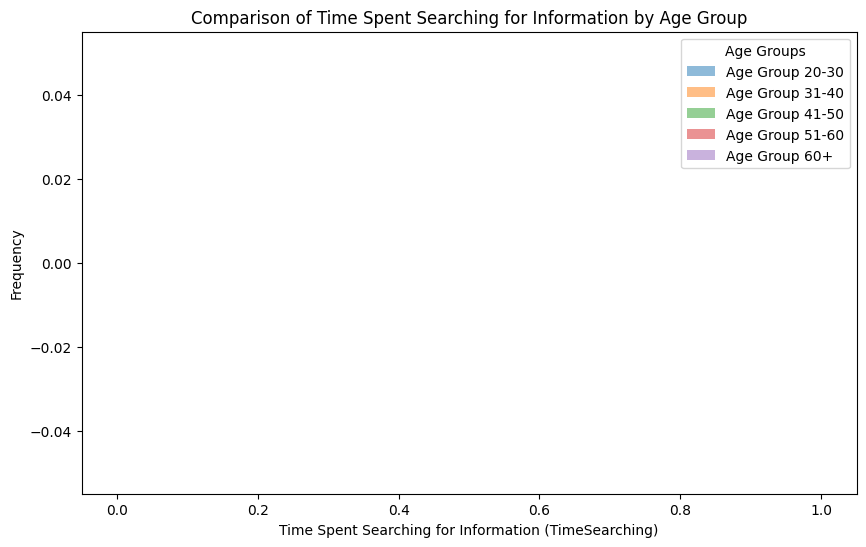

In [24]:
## Write your code hereimport sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'Age' and 'TimeSearching' columns
data_query = "SELECT Age, TimeSearching FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'Age' and 'TimeSearching' columns to numeric, coercing errors to NaN (if any non-numeric values)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['TimeSearching'] = pd.to_numeric(data['TimeSearching'], errors='coerce')

# Drop rows with NaN in 'Age' or 'TimeSearching'
data_cleaned = data.dropna(subset=['Age', 'TimeSearching'])

# Define age groups (e.g., 20-30, 31-40, etc.)
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '31-40', '41-50', '51-60', '60+']
data_cleaned['AgeGroup'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels, right=False)

# Plot histograms of 'TimeSearching' for each age group
plt.figure(figsize=(10, 6))
for label in labels:
    subset = data_cleaned[data_cleaned['AgeGroup'] == label]
    plt.hist(subset['TimeSearching'], bins=20, alpha=0.5, label=f'Age Group {label}')

# Add labels and title
plt.xlabel('Time Spent Searching for Information (TimeSearching)')
plt.ylabel('Frequency')
plt.title('Comparison of Time Spent Searching for Information by Age Group')
plt.legend(title='Age Groups')

# Show the plot
plt.show()

# Close the connection
conn.close()



### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


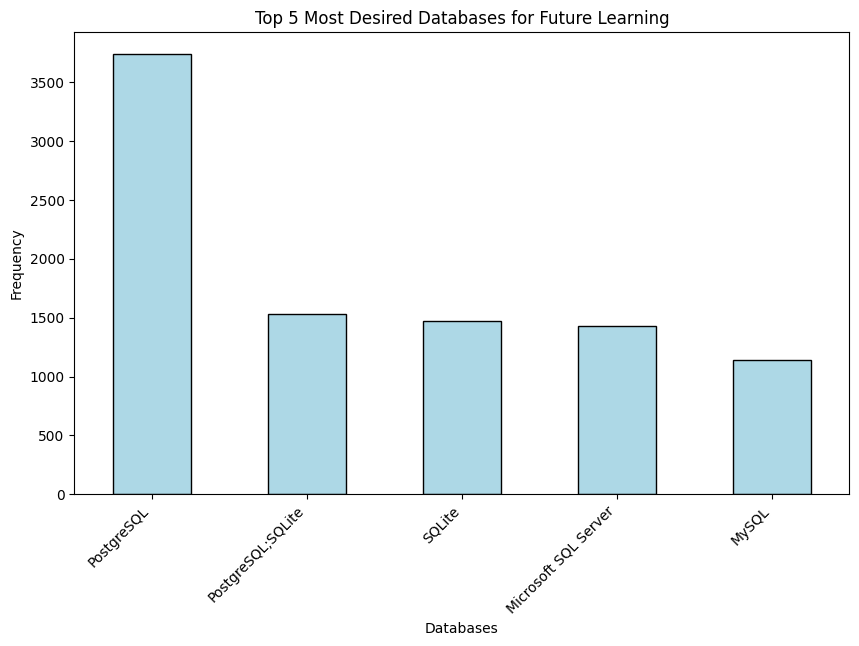

In [25]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for the 'DatabaseWantToWorkWith' column
data_query = "SELECT DatabaseWantToWorkWith FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Clean the data by removing any NaN values
data_cleaned = data.dropna(subset=['DatabaseWantToWorkWith'])

# Count the frequency of each database
database_counts = data_cleaned['DatabaseWantToWorkWith'].value_counts()

# Select the top 5 most desired databases
top_5_databases = database_counts.head(5)

# Plot a bar chart of the top 5 most desired databases
plt.figure(figsize=(10, 6))
top_5_databases.plot(kind='bar', color='lightblue', edgecolor='black')

# Add labels and title
plt.xlabel('Databases')
plt.ylabel('Frequency')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

# Close the connection
conn.close()


**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


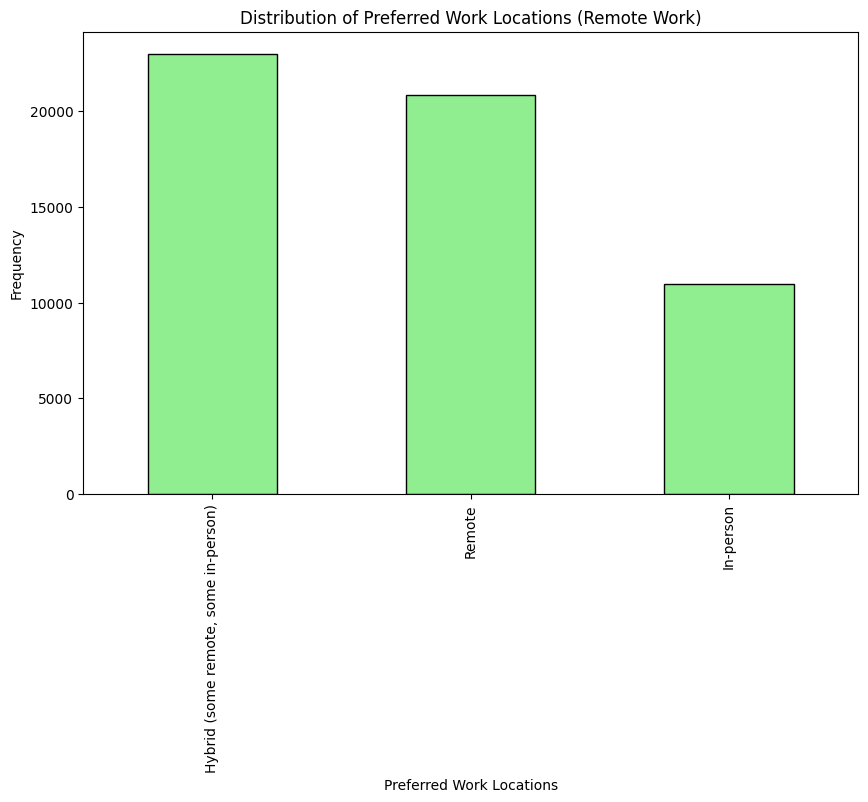

In [26]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'RemoteWork' column
data_query = "SELECT RemoteWork FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Clean the data by removing any NaN values
data_cleaned = data.dropna(subset=['RemoteWork'])

# Count the frequency of each preferred work location
remote_work_counts = data_cleaned['RemoteWork'].value_counts()

# Plot a bar chart of preferred work locations
plt.figure(figsize=(10, 6))
remote_work_counts.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel('Preferred Work Locations')
plt.ylabel('Frequency')
plt.title('Distribution of Preferred Work Locations (Remote Work)')

# Show the plot
plt.show()

# Close the connection
conn.close()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


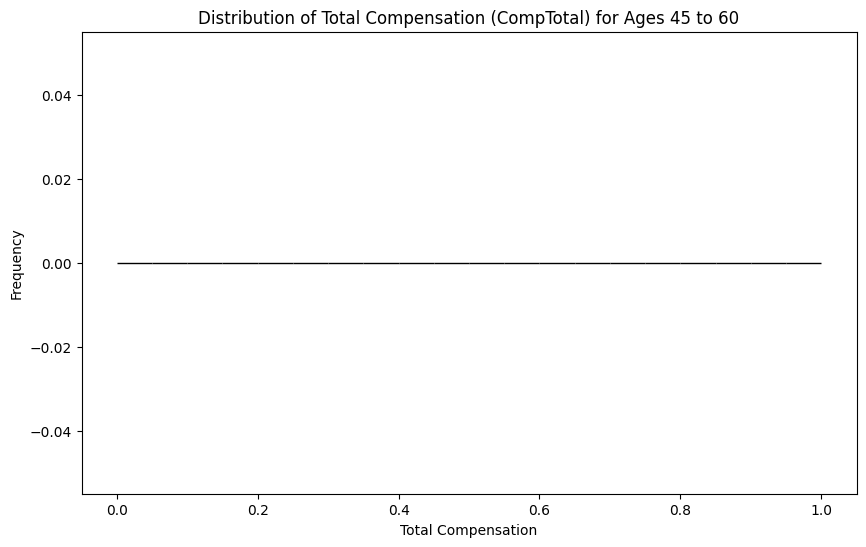

In [27]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'Age' and 'CompTotal' columns
data_query = "SELECT Age, CompTotal FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'Age' and 'CompTotal' columns to numeric, coercing errors to NaN (if any non-numeric values)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['CompTotal'] = pd.to_numeric(data['CompTotal'], errors='coerce')

# Drop rows with NaN in 'Age' or 'CompTotal'
data_cleaned = data.dropna(subset=['Age', 'CompTotal'])

# Filter data for respondents between ages 45 and 60
age_group_data = data_cleaned[(data_cleaned['Age'] >= 45) & (data_cleaned['Age'] <= 60)]

# Plot the histogram of 'CompTotal' for this age group
plt.figure(figsize=(10, 6))
plt.hist(age_group_data['CompTotal'], bins=20, color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Compensation (CompTotal) for Ages 45 to 60')

# Show the plot
plt.show()

# Close the connection
conn.close()


**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


/tmp/ipykernel_898/2195415999.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['YearsCodeGroup'] = pd.cut(data_cleaned['YearsCodePro'], bins=bins, labels=labels, right=False)


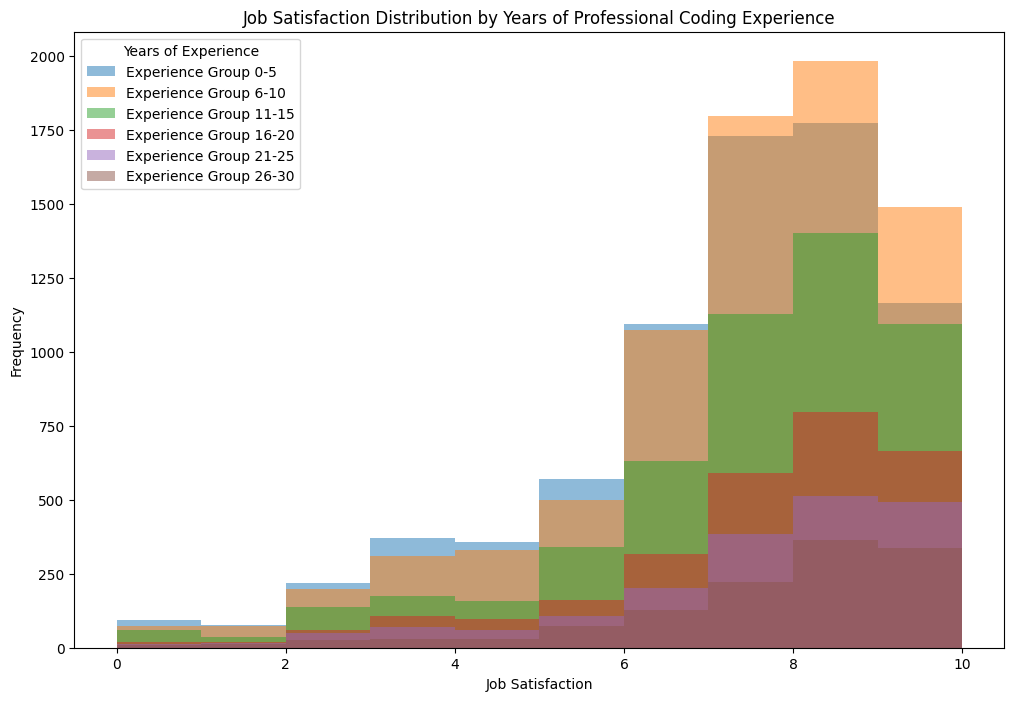

In [28]:
## Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')  # Replace with your actual database file

# Query the data for 'JobSat' and 'YearsCodePro' columns
data_query = "SELECT JobSat, YearsCodePro FROM main;"  # Replace 'main' with your actual table name
data = pd.read_sql_query(data_query, conn)

# Convert 'JobSat' and 'YearsCodePro' columns to numeric, coercing errors to NaN (if any non-numeric values)
data['JobSat'] = pd.to_numeric(data['JobSat'], errors='coerce')
data['YearsCodePro'] = pd.to_numeric(data['YearsCodePro'], errors='coerce')

# Drop rows with NaN in 'JobSat' or 'YearsCodePro'
data_cleaned = data.dropna(subset=['JobSat', 'YearsCodePro'])

# Group the 'YearsCodePro' into ranges (e.g., 0-5 years, 6-10 years, etc.)
bins = [0, 5, 10, 15, 20, 25, 30]  # Adjust the bin ranges if needed
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30']
data_cleaned['YearsCodeGroup'] = pd.cut(data_cleaned['YearsCodePro'], bins=bins, labels=labels, right=False)

# Plot histograms of 'JobSat' for each experience group
plt.figure(figsize=(12, 8))

# Loop over each experience group to plot individual histograms
for label in labels:
    subset = data_cleaned[data_cleaned['YearsCodeGroup'] == label]
    plt.hist(subset['JobSat'], bins=10, alpha=0.5, label=f'Experience Group {label}')

# Add labels and title
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.title('Job Satisfaction Distribution by Years of Professional Coding Experience')
plt.legend(title='Years of Experience')

# Show the plot
plt.show()

# Close the connection
conn.close()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [29]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
